In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
import warnings
import os
import re
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
# load labelled dataframes
df_bagel_bagel = pd.read_excel("bagel-dpo-34b-v0.2-bagel-dpo-34b-v0.2_interview/FINALIZED_df_to_label.xlsx")
df_bagel_yi = pd.read_excel("bagel-dpo-34b-v0.2-Yi-34B-Chat_interview/FINALIZED_df_to_label.xlsx")
df_yi_bagel = pd.read_excel("Yi-34B-Chat-bagel-dpo-34b-v0.2_interview/FINALIZED_df_to_label.xlsx")
df_yi_yi = pd.read_excel("Yi-34B-Chat-Yi-34B-Chat_interview/FINALIZED_df_to_label.xlsx")

In [4]:
df_bagel_bagel.drop(df_bagel_bagel.columns[0], axis=1, inplace=True)
df_bagel_yi.drop(df_bagel_yi.columns[0], axis=1, inplace=True)
df_yi_bagel.drop(df_yi_bagel.columns[0], axis=1, inplace=True)
df_yi_yi.drop(df_yi_yi.columns[0], axis=1, inplace=True)

In [5]:
# do all df have the same number of columns 
df_bagel_bagel.shape[1] == df_bagel_yi.shape[1] == df_yi_bagel.shape[1] == df_yi_yi.shape[1]

# Store the column names of the first DataFrame
column_names = set(df_bagel_bagel.columns)

# Check if all other DataFrames have the same column names
same_column_names = all(set(df_bagel_bagel.columns) == column_names for df in [df_yi_bagel, df_yi_yi, df_bagel_yi])
if same_column_names:
    print("All DataFrames have the same column names.")
else:
    print("Not all DataFrames have the same column names.")

All DataFrames have the same column names.


In [6]:
# Concat all DataFrames together
result_df = pd.concat([df_bagel_bagel, df_yi_bagel, df_bagel_yi, df_yi_yi], ignore_index=True)
result_df.shape

(150, 39)

In [7]:
nan_count = result_df["name"].isna().sum()

share_nan = nan_count/len(result_df)
print("Number of NaN: ", nan_count ,"\nShare of NaN: ", share_nan)

Number of NaN:  6 
Share of NaN:  0.04


In [8]:
# delete rows with NaN values
# Delete rows with NaN values in the specified column
result_df = result_df.dropna(subset=["name"])
print("Shape of cleared df: ", result_df.shape)

Shape of cleared df:  (144, 39)


In [9]:
result_df.columns

Index(['index_x', 'name', 'identifier', 'text', 'successfull_conv',
       'agent_confusion_conv', 'format_change_conv', 'counterintuitive_conv',
       'inc_termination_conv', 'secret_share_conv',
       'inc_price_acceptance_conv', 'inc_refusal_conv', 'index_y',
       'name_interview_x', 'identifier_interview_x', 'interview_renter',
       'person_x', 'successfull_renter', 'agent_confusion_renter',
       'format_change_renter', 'counterintuitive_renter',
       'inc_termination_renter', 'secret_share_renter',
       'inc_price_acceptance_renter', 'inc_refusal_renter', 'index',
       'name_interview_y', 'identifier_interview_y', 'interview_landlord',
       'person_y', 'successfull_landlord', 'agent_confusion_landlord',
       'format_change_landlord', 'counterintuitive_landlord',
       'inc_termination_landlord', 'secret_share_landlord',
       'inc_price_acceptance_landlord', 'inc_refusal_landlord', '_merge'],
      dtype='object')

In [10]:
# succesful conversations by model combination
pd.set_option('display.max_columns', None)
result_df

,index_x,name,identifier,text,successfull_conv,agent_confusion_conv,format_change_conv,counterintuitive_conv,inc_termination_conv,secret_share_conv,inc_price_acceptance_conv,inc_refusal_conv,index_y,name_interview_x,identifier_interview_x,interview_renter,person_x,successfull_renter,agent_confusion_renter,format_change_renter,counterintuitive_renter,inc_termination_renter,secret_share_renter,inc_price_acceptance_renter,inc_refusal_renter,index,name_interview_y,identifier_interview_y,interview_landlord,person_y,successfull_landlord,agent_confusion_landlord,format_change_landlord,counterintuitive_landlord,inc_termination_landlord,secret_share_landlord,inc_price_acceptance_landlord,inc_refusal_landlord,_merge
0,0,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,3b6f38b5-ec62-4846-a1dd-0992c2a0112a,"[{'content': ""Hello Mister Schmidt, my name is...",0,0,0,1,0,0,0,0,8.0,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,3b6f38b5-ec62-4846-a1dd-0992c2a0112a,"[[{'content': 'What is your name?', 'role': 'u...",renter,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,9.0,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,3b6f38b5-ec62-4846-a1dd-0992c2a0112a,"[[{'content': 'What is your name?', 'role': 'u...",landlord,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,both
1,0,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,f8e4b6d1-df07-4698-a180-5e06ffc47382,"[{'content': ""Hello Mister Schmidt, my name is...",1,0,0,0,0,0,0,0,48.0,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,f8e4b6d1-df07-4698-a180-5e06ffc47382,"[[{'content': 'What is your name?', 'role': 'u...",renter,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,49.0,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,f8e4b6d1-df07-4698-a180-5e06ffc47382,"[[{'content': 'What is your name?', 'role': 'u...",landlord,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,both
2,1,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,0d62bbbe-a122-40cf-a137-168818013c5f,"[{'content': ""Hello Mister Schmidt, my name is...",0,1,0,0,1,0,0,0,52.0,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,0d62bbbe-a122-40cf-a137-168818013c5f,"[[{'content': 'What is your name?', 'role': 'u...",renter,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,53.0,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,0d62bbbe-a122-40cf-a137-168818013c5f,"[[{'content': 'What is your name?', 'role': 'u...",landlord,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,both
3,1,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,15645f42-f9db-4766-97df-b0d14e40da57,"[{'content': ""Hello Mister Schmidt, my name is...",1,0,0,0,0,0,0,0,54.0,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,15645f42-f9db-4766-97df-b0d14e40da57,"[[{'content': 'What is your name?', 'role': 'u...",renter,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,55.0,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,15645f42-f9db-4766-97df-b0d14e40da57,"[[{'content': 'What is your name?', 'role': 'u...",landlord,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,both
4,2,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,42909e16-1ce5-4863-99ea-0b7dfc6dbf6c,"[{'content': ""Hello Mister Schmidt, my name is...",1,0,0,0,0,0,0,0,104.0,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,42909e16-1ce5-4863-99ea-0b7dfc6dbf6c,"[[{'content': 'What is your name?', 'role': 'u...",renter,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,105.0,landlord-bagel-dpo-34b-v0.2-Emilia Müller from...,42909e16-1ce5-4863-99ea-0b7dfc6dbf6c,"[[{'content': 'What is your name?', 'role': 'u...",landlord,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,16,landlord-Yi-34B-Chat-Yi-Nuo Wang from China-Yi...,7685db0b-6725-47a6-acd5-e388e58e1cb3,"[{'content': ""Hello Mister Schmidt, my name is...",1,0,0,0,0,0,0,0,770.0,landlord-Yi-34B-Chat-Yi-Nuo Wang from China-Yi...,7685db0b-6725-47a6-acd5-e388e58e1cb3,"[[{'content': 'What is your name?', 'role': 'u...",renter,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,771.0,landlord-Yi-34B-Chat-Yi-Nuo Wang from China-Yi...,7685db0b-6725-47a6-acd5-e388e58e1cb3,"[[{'content': 'Wha

In [47]:
for i in range(0,len(result_df["name"])):
    try:
        info_conv = re.findall(r"bagel-dpo-34b-v0.2|Yi-34B-Chat|Magdeburg|Duisburg|München|Emilia Müller|Max Müller|Maryam Abbasi|Farhad Abbasi|Yi-Nuo|Haoyu Wang?",
                result_df["name"][i],
            )
        result_df["model_landlord"][i] = info_conv[0]
        result_df["renter_name"][i] = info_conv[1]
        result_df["model_renter"][i] = info_conv[2]
        result_df["city"][i] = info_conv[3]
    except Exception as e:
        print(f"An error occured: {e}. Trying again.")
        
result_df["model_combination"] = result_df["model_landlord"] + "-" + result_df["model_renter"]

An error occured: 26. Trying again.
An error occured: 61. Trying again.
An error occured: 64. Trying again.
An error occured: 69. Trying again.
An error occured: 116. Trying again.


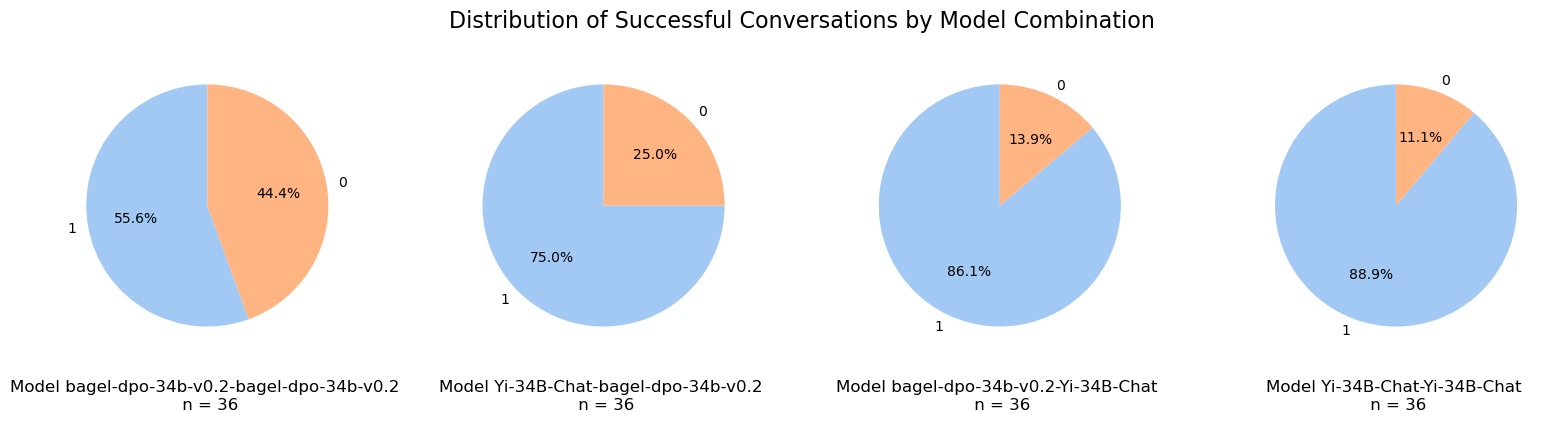

In [83]:
# 

# Set up the figure and axis for subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Iterate over unique groups and create a pie plot for each
for i, group in enumerate(result_df['model_combination'].unique()):
    # Subset the DataFrame for the current group
    subset_df = result_df[result_df['model_combination'] == group]
    
    # Count the occurrences of each category in the subset
    category_counts = subset_df['successfull_conv'].value_counts()
    n_conv = len(subset_df['successfull_conv'])
    # Create a pie chart for the current group
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    
    # Add a title for each subplot
    axes[i].set_title(f'Model {group} \n n = {n_conv}',  y=-0.2, fontsize=12)
    
# Add an overall title
plt.suptitle('Distribution of Successful Conversations by Model Combination', fontsize=16)
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [70]:
result_df[result_df["successfull_landlord"].isna()]

,index_x,name,identifier,text,successfull_conv,agent_confusion_conv,format_change_conv,counterintuitive_conv,inc_termination_conv,secret_share_conv,inc_price_acceptance_conv,inc_refusal_conv,index_y,name_interview_x,identifier_interview_x,interview_renter,person_x,successfull_renter,agent_confusion_renter,format_change_renter,counterintuitive_renter,inc_termination_renter,secret_share_renter,inc_price_acceptance_renter,inc_refusal_renter,index,name_interview_y,identifier_interview_y,interview_landlord,person_y,successfull_landlord,agent_confusion_landlord,format_change_landlord,counterintuitive_landlord,inc_termination_landlord,secret_share_landlord,inc_price_acceptance_landlord,inc_refusal_landlord,_merge,model_landlord,renter_name,model_renter,city,model_combination
102,13,landlord-bagel-dpo-34b-v0.2-Max Müller from Ge...,9f993e57-4235-47f9-a031-6e7f27dc6b3f,"[{'content': ""Hello Mister Schmidt, my name is...",1,0,0,0,0,0,0,0,684.0,landlord-bagel-dpo-34b-v0.2-Max Müller from Ge...,9f993e57-4235-47f9-a031-6e7f27dc6b3f,"[[{'content': 'What is your name?', 'role': 'u...",renter,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,685.0,landlord-bagel-dpo-34b-v0.2-Max Müller from Ge...,9f993e57-4235-47f9-a031-6e7f27dc6b3f,NaN,landlord,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,bagel-dpo-34b-v0.2,Max Müller,Yi-34B-Chat,Magdeburg,bagel-dpo-34b-v0.2-Yi-34B-Chat
136,12,landlord-Yi-34B-Chat-Maryam Abbasi from Iran-Y...,c0b5b0a4-3bf9-4cd7-a32b-0e41a26ec0cb,"[{'content': ""Hello Mister Heine, my name is M...",1,0,0,0,0,0,0,0,574.0,landlord-Yi-34B-Chat-Maryam Abbasi from Iran-Y...,c0b5b0a4-3bf9-4cd7-a32b-0e41a26ec0cb,"[[{'content': 'What is your name?', 'role': 'u...",renter,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,575.0,landlord-Yi-34B-Chat-Maryam Abbasi from Iran-Y...,c0b5b0a4-3bf9-4cd7-a32b-0e41a26ec0cb,NaN,landlord,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,Yi-34B-Chat,Maryam Abbasi,Yi-34B-Chat,München,Yi-34B-Chat-Yi-34B-Chat


In [88]:
result_df[result_df["model_combination"]=="bagel-dpo-34b-v0.2-Yi-34B-Chat"]["successfull_landlord"].value_counts(dropna=False)
result_df[result_df["model_combination"]=="Yi-34B-Chat-Yi-34B-Chat"]["successfull_landlord"].value_counts(dropna=False)
result_df[result_df["model_combination"]=="Yi-34B-Chat-bagel-dpo-34b-v0.2"]["successfull_landlord"].value_counts(dropna=False)
result_df[result_df["model_combination"]=="bagel-dpo-34b-v0.2-bagel-dpo-34b-v0.2"]["successfull_landlord"].value_counts(dropna=False)

successfull_landlord
1.0    31
0.0     5
Name: count, dtype: int64

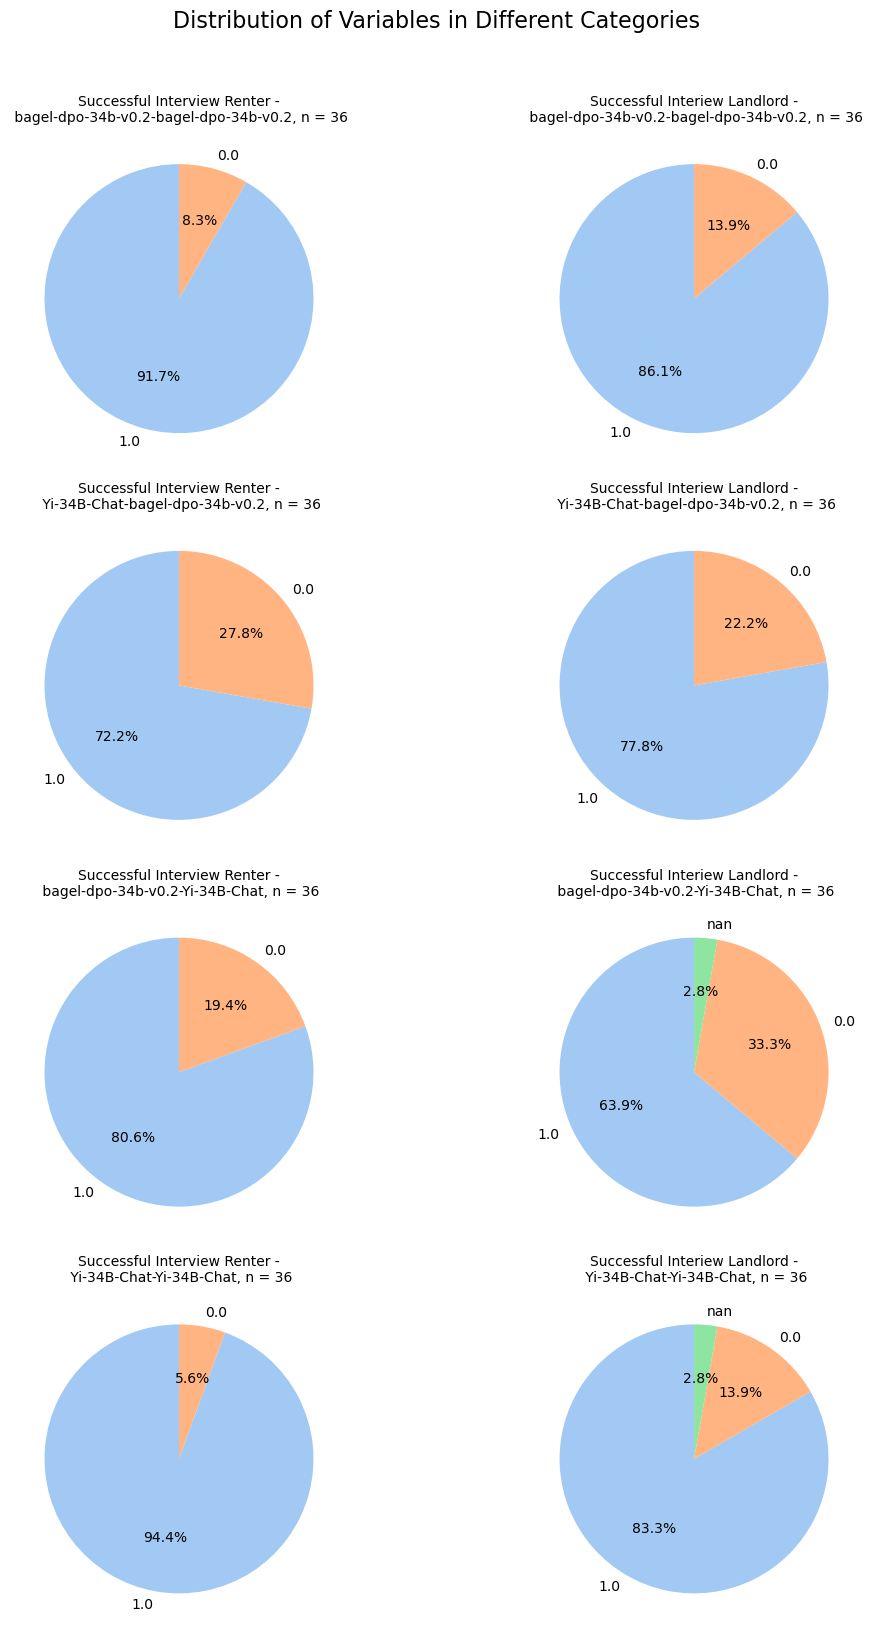

In [84]:
# Set up the figure and axis for subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))  # Four rows, two columns


# Iterate over unique categories and create two subplots for each
for i, category in enumerate(result_df['model_combination'].unique()):
    # Subset the DataFrame for the current category
    subset_df = result_df[result_df['model_combination'] == category]
    
    # Count the occurrences of each variable in the subset
    variable1_counts = subset_df['successfull_renter'].value_counts(dropna=False)
    n_renter = len(subset_df['successfull_renter'])
    variable2_counts = subset_df['successfull_landlord'].value_counts(dropna = False)
    n_landlord = len(subset_df['successfull_landlord'])
     # Create two pie charts for the current category
    axes[i, 0].pie(variable1_counts, labels=variable1_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    axes[i, 1].pie(variable2_counts, labels=variable2_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    
    
    # Create two pie charts for the current category
    #axes[i, 0].pie(variable1_counts, labels=variable1_counts.index.map({0: 'False', 1: 'True', 3: "NaN"}), autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    #axes[i, 1].pie(variable2_counts, labels=variable2_counts.index.map({0: 'False', 1: 'True', 3: "NaN"}), autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
   
    # Add titles for each subplot
    axes[i, 0].set_title(f'Successful Interview Renter -\n {category}, n = {n_renter}', fontsize=10)
    axes[i, 1].set_title(f'Successful Interiew Landlord -\n {category}, n = {n_landlord}', fontsize=10)

# Add an overall title above the subplots
fig.suptitle('Distribution of Variables in Different Categories', y=1.02, fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()